In [30]:
import pathlib
import shutil
import subprocess

import matplotlib.pyplot as plt
import numpy as np

In [7]:
def download_from_kaggle(expr, /, data_dir=None):
    """Download all files from the Kaggle competition/dataset.

    Args:
        expr: Match expression to be used by kaggle API, e.g.
            "kaggle competitions download -c competition" or
            "kaggle datasets download -d user/dataset".
        data_dir: Optional. Directory path where to save files. Default to `None`,
        which means that files will be downloaded to `data` directory.

    Notes:
        If the associated files already exists, then it does nothing.
    """

    if data_dir is None:
        data_dir = pathlib.Path("../data/raw/")
    else:
        data_dir = pathlib.Path(data_dir)

    match expr.split():
        case ["kaggle", _, "download", *args] if args:
            data_dir.mkdir(parents=True, exist_ok=True)
            filename = args[-1].split("/")[-1] + ".zip"
            if not (data_dir / filename).is_file():
                subprocess.run(expr)
                shutil.unpack_archive(filename, data_dir)
                shutil.move(filename, data_dir)
        case _:
            raise SyntaxError("Invalid expression!")

In [18]:
dataset = "tyre-quality-classification"
user = "warcoder"
expr = f"kaggle datasets download -d {user}/{dataset}"

download_from_kaggle(expr)
dataset_path = pathlib.Path("../data/raw/Digital images of defective and good condition tyres")

In [21]:
def show_dir_tree(path, level=0, indent=4, max_files=3):
    if level == 0:
        print(pathlib.Path(path))
        level += 1

    sub_paths = sorted(path.iterdir())
    sub_dirs = [sub_path for sub_path in sub_paths if sub_path.is_dir()]
    filepaths = [sub_path for sub_path in sub_paths if not sub_path in sub_dirs]
    indent_str = "-" * indent * level + " "

    for sub_dir in sub_dirs:
        print(f"{indent_str}{sub_dir.name}/")
        show_dir_tree(sub_dir, level + 1, indent)

    for filepath in filepaths[:max_files]:
        print(f"{indent_str}{filepath.name}")

    if len(filepaths) > max_files:
        print(f"{indent_str}...")

In [22]:
show_dir_tree(dataset_path)

..\data\raw\Digital images of defective and good condition tyres
---- defective/
-------- Defective (1).jpg
-------- Defective (10).jpg
-------- Defective (100).jpg
-------- ...
---- good/
-------- good (1).jpg
-------- good (10).jpg
-------- good (100).jpg
-------- ...


In [45]:
defect_imgs = tuple(dataset_path.glob("defective/*"))
good_imgs = tuple(dataset_path.glob("good/*"))

defect_size = len(defect_imgs)
good_size = len(good_imgs)
total_size = defect_size + good_size

print("Number of Defective Tyre Images:".ljust(35), defect_size)
print("Number of Good Tyre Images:".ljust(35), good_size)

Number of Defective Tyre Images:    1028
Number of Good Tyre Images:         828


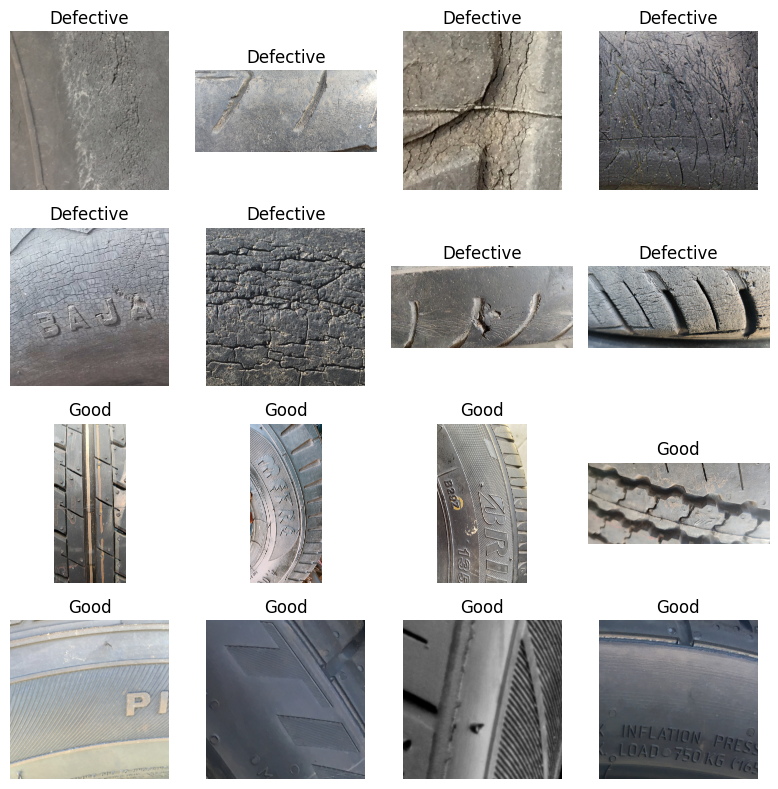

In [42]:
example_images = np.hstack((np.random.choice(defect_imgs, 8), np.random.choice(good_imgs, 8)))  # type: ignore
example_labels = ["Defective"] * 8 + ["Good"] * 8

plt.figure(figsize=(8, 8), tight_layout=True, facecolor="white")
for idx, (img_path, label) in enumerate(zip(example_images, example_labels), start=1):
    img = plt.imread(img_path)
    plt.subplot(4, 4, idx)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
    
plt.show()